In [1]:
# Importing the libraries 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True) 
# Load the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import missingno as msno
import re
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')


from scipy.stats.mstats import winsorize
import scipy.stats as stats


ids: идентификатор твита (например, 4587) 
date: дата твита (например, сб, 16 мая, 23:58:44 UTC 2009 г.)
флаг: запрос (например, lyx). Если запроса нет, то это значение равно NO_QUERY.
пользователь: пользователь, который написал твит (например, bobthebuilder)
текст: текст твита (например, Ликс классная)

In [2]:
df = pd.read_csv('ProjectTweets.csv')
# looking at the dataset
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [3]:
df.rename(columns={'0': 'number','1467810369':'id','Mon Apr 06 22:19:45 PDT 2009': 'date','NO_QUERY': 'flag','_TheSpecialOne_': 'user' }, inplace=True)



In [4]:
df.head()

,number,id,date,flag,user,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [5]:
new_column_name = 'text'
df.rename(columns={df.columns[5]: new_column_name}, inplace=True)

df.head()

,number,id,date,flag,user,text
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
df['flag'].value_counts()

flag
NO_QUERY    1599999
Name: count, dtype: int64

In [7]:
df=df.drop(columns=['number','id', 'flag'])
df.head()

,date,user,text
0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
2,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
4,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew


In [8]:
# Text transformation to lowercase
df['text'] =df['text'].str.lower()
df['text']

0          is upset that he can't update his facebook by ...
1          @kenichan i dived many times for the ball. man...
2            my whole body feels itchy and like its on fire 
3          @nationwideclass no, it's not behaving at all....
4                              @kwesidei not the whole crew 
                                 ...                        
1599994    just woke up. having no school is the best fee...
1599995    thewdb.com - very cool to hear old walt interv...
1599996    are you ready for your mojo makeover? ask me f...
1599997    happy 38th birthday to my boo of alll time!!! ...
1599998    happy #charitytuesday @thenspcc @sparkscharity...
Name: text, Length: 1599999, dtype: object

In [9]:
# URL removal from text
df['text'] = df['text'].apply(lambda x:re.sub(r"http\S+", "", x))
df["text"]

0          is upset that he can't update his facebook by ...
1          @kenichan i dived many times for the ball. man...
2            my whole body feels itchy and like its on fire 
3          @nationwideclass no, it's not behaving at all....
4                              @kwesidei not the whole crew 
                                 ...                        
1599994    just woke up. having no school is the best fee...
1599995    thewdb.com - very cool to hear old walt interv...
1599996    are you ready for your mojo makeover? ask me f...
1599997    happy 38th birthday to my boo of alll time!!! ...
1599998    happy #charitytuesday @thenspcc @sparkscharity...
Name: text, Length: 1599999, dtype: object

In [10]:
import string

In [11]:
# Punctuation from text
punctuation_removal = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', punctuation_removal))
df["text"] = df["text"].apply(lambda text: remove_punctuation(text))
df["text"]

0          is upset that he cant update his facebook by t...
1          kenichan i dived many times for the ball manag...
2            my whole body feels itchy and like its on fire 
3          nationwideclass no its not behaving at all im ...
4                               kwesidei not the whole crew 
                                 ...                        
1599994    just woke up having no school is the best feel...
1599995    thewdbcom  very cool to hear old walt intervie...
1599996    are you ready for your mojo makeover ask me fo...
1599997    happy 38th birthday to my boo of alll time tup...
1599998    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1599999, dtype: object

In [12]:
# Single character and double space removal from the text
df["text"] = df["text"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
df["text"] = df["text"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
df["text"]

0          is upset that he cant update his facebook by t...
1          kenichandived many times for the ball managed ...
2            my whole body feels itchy and like its on fire 
3          nationwideclass no its not behaving at all im ...
4                               kwesidei not the whole crew 
                                 ...                        
1599994    just woke up having no school is the best feel...
1599995    thewdbcom very cool to hear old walt interview...
1599996    are you ready for your mojo makeover ask me fo...
1599997    happy 38th birthday to my boo of alll time tup...
1599998    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1599999, dtype: object

In [13]:
# Emoji Removal
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
df["text"] = df["text"].apply(str)
df["text"] = df["text"].apply(remove_emoji)
df["text"]

0          is upset that he cant update his facebook by t...
1          kenichandived many times for the ball managed ...
2            my whole body feels itchy and like its on fire 
3          nationwideclass no its not behaving at all im ...
4                               kwesidei not the whole crew 
                                 ...                        
1599994    just woke up having no school is the best feel...
1599995    thewdbcom very cool to hear old walt interview...
1599996    are you ready for your mojo makeover ask me fo...
1599997    happy 38th birthday to my boo of alll time tup...
1599998    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1599999, dtype: object

In [14]:
# Single character and double space removal from text
df["text"] = df["text"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
df["text"] = df["text"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
df["text"]

0          is upset that he cant update his facebook by t...
1          kenichandived many times for the ball managed ...
2            my whole body feels itchy and like its on fire 
3          nationwideclass no its not behaving at all im ...
4                               kwesidei not the whole crew 
                                 ...                        
1599994    just woke up having no school is the best feel...
1599995    thewdbcom very cool to hear old walt interview...
1599996    are you ready for your mojo makeover ask me fo...
1599997    happy 38th birthday to my boo of alll time tup...
1599998    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1599999, dtype: object

In [15]:
# Most common words in the text
from collections import Counter
cnt = Counter()
for text in df["text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('to', 556063),
 ('the', 517438),
 ('my', 312073),
 ('you', 263475),
 ('and', 263066),
 ('it', 223549),
 ('is', 223104),
 ('in', 197411),
 ('for', 195146),
 ('of', 176815)]

In [16]:
df_new=df
df_new.head()

,date,user,text
0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he cant update his facebook by t...
1,Mon Apr 06 22:19:53 PDT 2009,mattycus,kenichandived many times for the ball managed ...
2,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,Mon Apr 06 22:19:57 PDT 2009,Karoli,nationwideclass no its not behaving at all im ...
4,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,kwesidei not the whole crew


In [17]:
df_new.user.value_counts()

user
lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
iheartrobpattz       1
67trinity            1
Sibby                1
mAnyA_15             1
bpbabe               1
Name: count, Length: 659775, dtype: int64

In [18]:
# df_new.to_csv('df_new.txt', sep='\t', index=False)

# вывести на мап редюсу топ 10 юзеров!!! сохранить результаты 
### Сохранение данных и последующий анализ выходных данных. При необходимости его можно извлечь из базы данных NoSQL в другой формат с помощью соответствующего инструмента (например, извлечь в CSV для импорта в R/Python и т. д.).

In [19]:
# top 10 users
from collections import Counter
cnt = Counter()
for text in df_new["user"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('lost_dog', 549),
 ('webwoke', 345),
 ('tweetpet', 310),
 ('SallytheShizzle', 281),
 ('VioletsCRUK', 279),
 ('mcraddictal', 276),
 ('tsarnick', 248),
 ('what_bugs_u', 246),
 ('Karen230683', 238),
 ('DarkPiano', 236)]

In [20]:
top_10_users = cnt.most_common(10)

In [21]:
top_10_users = pd.DataFrame(top_10_users, columns=["User", "Tweet count"])

# Вывод таблицы
print(top_10_users)

              User  Tweet count
0         lost_dog          549
1          webwoke          345
2         tweetpet          310
3  SallytheShizzle          281
4      VioletsCRUK          279
5      mcraddictal          276
6         tsarnick          248
7      what_bugs_u          246
8      Karen230683          238
9        DarkPiano          236


In [22]:
top_10_users.head(10)

,User,Tweet count
0,lost_dog,549
1,webwoke,345
2,tweetpet,310
3,SallytheShizzle,281
4,VioletsCRUK,279
5,mcraddictal,276
6,tsarnick,248
7,what_bugs_u,246
8,Karen230683,238
9,DarkPiano,236


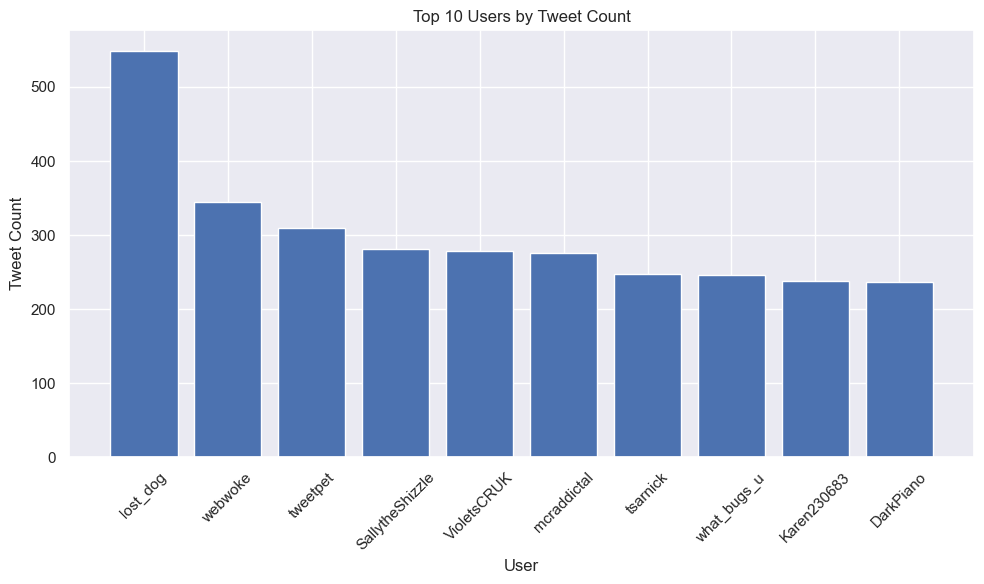

In [23]:
# Получение данных для графика
user_counts = cnt.most_common(10)
users = [user[0] for user in user_counts]
tweet_counts = [user[1] for user in user_counts]

# Создание графика
plt.figure(figsize=(10, 6))
plt.bar(users, tweet_counts)
plt.xlabel("User")
plt.ylabel("Tweet Count")
plt.title("Top 10 Users by Tweet Count")
plt.xticks(rotation=45)
plt.tight_layout()

# Отображение графика
plt.show()





# определить в какой день было больше всего твитов

df_new.to_csv("df_new.csv")



# Сохранение данных в текстовый файл
df_new.to_csv('df_new.txt', sep='\t', index=False)


In [24]:
#msno.matrix(df) 

In [25]:
df_new.head()

,date,user,text
0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he cant update his facebook by t...
1,Mon Apr 06 22:19:53 PDT 2009,mattycus,kenichandived many times for the ball managed ...
2,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,Mon Apr 06 22:19:57 PDT 2009,Karoli,nationwideclass no its not behaving at all im ...
4,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,kwesidei not the whole crew


In [26]:
#df_new.to_csv("df_data.csv")

In [27]:
# Преобразование столбца с датой в формат datetime
df_new['date'] = pd.to_datetime(df_new['date']).dt.date 

In [28]:
df_new.head()

,date,user,text
0,2009-04-06,scotthamilton,is upset that he cant update his facebook by t...
1,2009-04-06,mattycus,kenichandived many times for the ball managed ...
2,2009-04-06,ElleCTF,my whole body feels itchy and like its on fire
3,2009-04-06,Karoli,nationwideclass no its not behaving at all im ...
4,2009-04-06,joy_wolf,kwesidei not the whole crew


In [29]:
print(df_new['date'].dtype)


object


In [30]:
print(df_new.columns)

Index(['date', 'user', 'text'], dtype='object')


In [31]:
#df_new['date'] = pd.to_datetime(df_new['date'])

In [32]:
#df_new.index = pd.to_datetime(df_new['date'], format='%Y-%m-%d')
#del df_new['date']

#print(df_new.columns)


In [33]:
df_new.head()

,date,user,text
0,2009-04-06,scotthamilton,is upset that he cant update his facebook by t...
1,2009-04-06,mattycus,kenichandived many times for the ball managed ...
2,2009-04-06,ElleCTF,my whole body feels itchy and like its on fire
3,2009-04-06,Karoli,nationwideclass no its not behaving at all im ...
4,2009-04-06,joy_wolf,kwesidei not the whole crew


In [34]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alyona_dushkina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alyona_dushkina/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
#stopwords are the words which won't bring about any changes to the polarity of the tweet
stop_words = stopwords.words('english')   
len(stop_words),stop_words[5:10]

(179, ['our', 'ours', 'ourselves', 'you', "you're"])

In [36]:
# function to remove stopwords
def stopWords(tweet):
  clean_tweet = tweet
  clean_tweet = " ".join(word for word in clean_tweet.split() if word not in stop_words)
# clean_tweet = " ".join(lemmatizer.lemmatize(word) for word in clean_tweet.split())
  return clean_tweet

In [37]:
df_new['text'] = df_new['text'].apply(lambda x: stopWords(x))

In [38]:
df_new.head()

,date,user,text
0,2009-04-06,scotthamilton,upset cant update facebook texting might cry a...
1,2009-04-06,mattycus,kenichandived many times ball managed save 50 ...
2,2009-04-06,ElleCTF,whole body feels itchy like fire
3,2009-04-06,Karoli,nationwideclass behaving im mad amhere because...
4,2009-04-06,joy_wolf,kwesidei whole crew


In [39]:
from textblob import TextBlob
# Function to assign polarity and subjectivity to the tweets
def blob_fun(text):
  senti = TextBlob(text)
  senti_polarity = senti.sentiment.polarity
  senti_subjectivity = senti.sentiment.subjectivity

  if senti_polarity > 0:
    res = 'Positive'

  elif senti_polarity < 0:
    res = 'Negative'

  elif senti_polarity == 0:
    res ="Neutral"

  result = {'polarity':senti_polarity,'subjectivity':senti_subjectivity,'sentiment':res}

  return result

In [40]:
df_new['results'] = df_new['text'].apply(blob_fun)


In [41]:
df_sentiment = df_new.join(pd.json_normalize(data=df_new['results']))


In [42]:
df_sentiment.head()

,date,user,text,results,polarity,subjectivity,sentiment
0,2009-04-06,scotthamilton,upset cant update facebook texting might cry a...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000,0.0,Neutral
1,2009-04-06,mattycus,kenichandived many times ball managed save 50 ...,"{'polarity': 0.5, 'subjectivity': 0.5, 'sentim...",0.500,0.5,Positive
2,2009-04-06,ElleCTF,whole body feels itchy like fire,"{'polarity': 0.2, 'subjectivity': 0.4, 'sentim...",0.200,0.4,Positive
3,2009-04-06,Karoli,nationwideclass behaving im mad amhere because...,"{'polarity': -0.625, 'subjectivity': 1.0, 'sen...",-0.625,1.0,Negative
4,2009-04-06,joy_wolf,kwesidei whole crew,"{'polarity': 0.2, 'subjectivity': 0.4, 'sentim...",0.200,0.4,Positive


In [43]:
df_sentiment["sentiment"].value_counts() 

sentiment
Neutral     689148
Positive    614630
Negative    296221
Name: count, dtype: int64

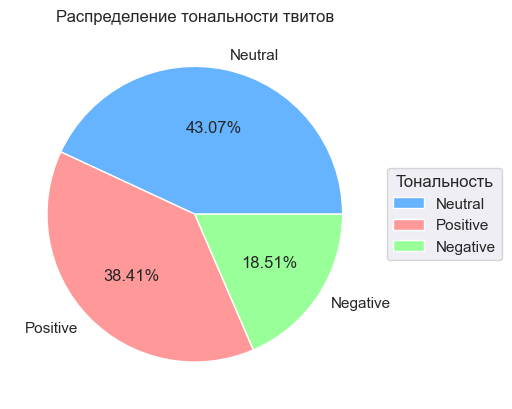

In [45]:
# Определите цвета для сегментов круговой диаграммы
colors = ['#66b3ff', '#ff9999', '#99ff99']

# Создание круговой диаграммы
ax = df_sentiment['sentiment'].value_counts().plot.pie(autopct='%.2f%%', colors=colors)

# Добавление заголовка
plt.title('Распределение тональности твитов')

# Устанавливаем расстояние между сегментами и их подписями
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title='Тональность', loc='center left', bbox_to_anchor=(1.0, 0, 0.5, 1))

# Отображение круговой диаграммы
plt.show()

Повышение частоты дискретизации для компенсации дисбаланса категорий.
Проблема дисбаланса категорий возникает, когда одна метка появляется чаще, чем другие. В такой ситуации классификаторы, как правило, перегружены большими классами и игнорируют маленькие.

Применительно к нашему набору данных твитов мы замечаем дисбаланс между классами. По той же причине наша модель может склоняться к нейтральности. Неуправляемый дисбаланс категорий сделал бы нашу модель упрощенной и неточной.

In [46]:
# Разделим DataFrame на отдельные классы
df_positive = df_sentiment[df_sentiment['sentiment'] == 'Positive']
df_negative = df_sentiment[df_sentiment['sentiment'] == 'Negative']
df_neutral = df_sentiment[df_sentiment['sentiment'] == 'Neutral']

# Определим размер класса большинства (нейтральные твиты)
majority_size = df_neutral.shape[0]

# Сгенерируем случайные индексы для апсемплинга положительных и отрицательных твитов
random_indices_positive = np.random.choice(df_positive.index, size=majority_size, replace=True)
random_indices_negative = np.random.choice(df_negative.index, size=majority_size, replace=True)

# Получим новые DataFrame для положительных и отрицательных твитов
df_positive_upsampled = df_positive.loc[random_indices_positive]
df_negative_upsampled = df_negative.loc[random_indices_negative]

# Объединим все DataFrame обратно в один DataFrame с добавленными новыми твитами
df_upsampled = pd.concat([df_neutral, df_positive_upsampled, df_negative_upsampled])

# Перемешаем данные для разнообразия
df_upsampled = df_upsampled.sample(frac=1).reset_index(drop=True)

# Проверим результаты
print(df_upsampled["sentiment"].value_counts())

sentiment
Positive    689148
Neutral     689148
Negative    689148
Name: count, dtype: int64


При апсемплинге вы рискуете получить переобучение, повторяя снова и снова одни и те же твиты. Но если ваш набор данных достаточно большой, это не должно быть проблемой.

<Axes: ylabel='count'>

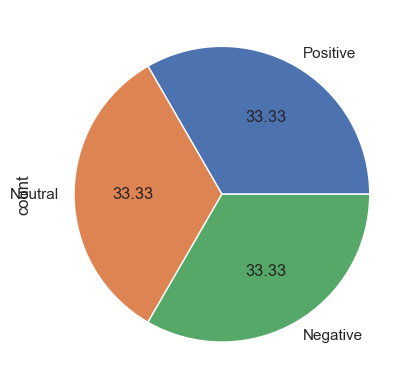

In [47]:
df_upsampled['sentiment'].value_counts().plot.pie(autopct= '%.2f')

In [48]:
df_upsampled.head()

,date,user,text,results,polarity,subjectivity,sentiment
0,2009-06-24,caitlingeiger,camtronsummerswont know untilget new work sche...,"{'polarity': 0.13636363636363635, 'subjectivit...",0.136364,0.454545,Positive
1,2009-06-15,mad_vtak,also togood friend congrats man engaged im hap...,"{'polarity': 0.8, 'subjectivity': 1.0, 'sentim...",0.800000,1.000000,Positive
2,2009-05-18,stupid_doll_,yaaaay finally,"{'polarity': 0.0, 'subjectivity': 1.0, 'sentim...",0.000000,1.000000,Neutral
3,2009-06-02,Geeklawyer,manxstef spoke canon take elstree ffs drive lo...,"{'polarity': -0.060714285714285714, 'subjectiv...",-0.060714,0.307143,Negative
4,2009-06-02,DrunkenNyt,simply orange thee best juice ever made,"{'polarity': 0.5, 'subjectivity': 0.3285714285...",0.500000,0.328571,Positive


# Ответим на первый вопрос: Прогноз количества твиттов общий для всех твиттов!

In [49]:
df_all=df_upsampled

In [50]:
df_all['date'] = pd.to_datetime(df_all['date'])
tweets_per_day = df_all.groupby(df_all['date'].dt.date)['text'].count()
tweets_per_day = pd.DataFrame(tweets_per_day)
tweets_per_day.head()

,text
date,
2009-04-06,4313
2009-04-07,22302
2009-04-17,3890
2009-04-18,27721
2009-04-19,34893


In [53]:
# df_all.to_csv('file2.csv')

Важно убедиться, что временной ряд является стационарным перед применением методов прогнозирования. На этапе анализа можно выполнить тесты на стационарность, такие как тест Дики-Фуллера (Dickey-Fuller test), чтобы удостовериться, что ряд является стационарным или применить методы дифференцирования для стабилизации ряда, если необходимо.

In [ ]:
from statsmodels.tsa.stattools import adfuller


In [ ]:
# Тест Дики-Фуллера (ADF)
result = adfuller(tweets_per_day)

# Вывод результатов
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


Выводы: В данном случае, ADF-статистика (-3.5773818190927917) меньше всех критических значений (-3.5778480370438146, -2.925338105429433, -2.6007735310095064) и p-значение (0.006208455957551378) меньше выбранного уровня значимости (например, 0.05). Это означает, что мы можем отвергнуть нулевую гипотезу о наличии единичного корня и считать временной ряд стационарным.

In [ ]:
tweets_per_day.rename(columns={'text': 'tweet count'},inplace=True)
sns.set()
plt.ylabel('tweet count')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.plot(tweets_per_day.index, tweets_per_day['tweet count'], )
plt.show()


#Таким образом, код выполняет анализ и визуализацию количества твитов (tweet count) по дням на линейном графике с соответствующими осями и метками. 
#Поворот меток по оси X делает график более читаемым, особенно если даты представлены в формате, который может быть перегружен.

In [ ]:
train = tweets_per_day[tweets_per_day.index < pd.to_datetime("2009-06-01").date()]
test = tweets_per_day[tweets_per_day.index >= pd.to_datetime("2009-06-01").date()]
test

Таким образом, после выполнения этого кода, переменная test будет содержать данные о твитах с 1 июня 2009 года и после этой даты, а переменная train будет содержать данные о твитах до 1 июня 2009 года, которые будут использоваться для обучения модели. Это позволяет нам проверить, насколько хорошо наша модель прогнозирует твиты на новых данных, которые не использовались в процессе обучения.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

y = train['tweet count']

ARMAmodel = SARIMAX(y, order = (1, 0, 1), seasonal_order=(0, 1, 0, 7))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], 
                                             end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_outARMA = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('tweet count')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.title("Train/Test split for tweet count")
plt.plot(y_pred_outARMA, color='green', label = 'ARMA Predictions')
plt.legend()
plt.show()

In [ ]:
# Создаем таблицу с прогнозами и реальными значениями
forecast_table = pd.DataFrame({'Actual': test['tweet count'], 'Predicted': y_pred_outARMA})
forecast_table.index.name = 'Date'

# Создаем информационную панель для прогноза
fig, ax = plt.subplots(figsize=(10, 6))

# Построение таблицы
ax.axis('off')
ax.table(cellText=forecast_table.values, colLabels=forecast_table.columns, cellLoc='center', loc='center')
table.set_fontsize(10)
table.scale(1, 1.5) 

# Отображение заголовка таблицы
ax.set_title('Прогноз количества твитов')

In [ ]:
# Группируем данные по дате и считаем количество твиттов в каждый день
#tweets_per_day = df_new.groupby(df_new['date'].dt.date)['text'].count()

In [ ]:
#tweets_per_day.head(10)

In [ ]:
#tweets_per_day = pd.DataFrame(tweets_per_day)

In [ ]:
#tweets_per_day.head(10)

In [ ]:
#d_new.date.value_counts()

tweets_per_day.index = pd.to_datetime(tweets_per_day['date'], format='%Y-%m-%d')
del tweets_per_day['date']

tweets_per_day.head(5)

df_new1=df_new.drop(columns=['text'])
df_new1.head()

In [ ]:
#train = tweets_per_day[tweets_per_day.index < pd.to_datetime("2009-06-01")]
#test = tweets_per_day[tweets_per_day.index >= pd.to_datetime("2009-06-01").date()]
#test


In [ ]:
#plt.plot(train, color = "black", label = 'Training')
#plt.plot(test, color = "red", label = 'Testing')
#plt.ylabel('User and text')
#plt.xlabel('date')
#plt.xticks(rotation=45)
#plt.title("Train/Test split for twitter")
#plt.show()

In [ ]:
#df.to_csv("df_time.csv")

In [ ]:
#from pyspark.sql import SparkSession 
#spark = SparkSession.builder.appName("Jupyter Notebook").getOrCreate()


In [ ]:
#spark

In [ ]:
#sc = spark.sparkContext

# Import regex module
#import re
#from operator import add

# Read input file from hadoop directory
# Copy a file from the local folder to hadoop folder
#file_in = sc.textFile('/user1/ProjectTweets.csv')